Nome: Thais Lima de Sousa nUSP 8941220

# Exercício 1 - P3

In [26]:
from vpi.io import *
from vpi.binary_morphology import *
from collections import deque
import numpy as np

<p><b>Exercício a:</b> contar a quantidade de moedas da imagem.</p><p>
Na imagem dada, as moedas estão muito próximas. Precisamos distinguir duas ou mais moedas no caso em que formam uma só componente conexa na imagem binária. Primeiramente, transformamos a imagem em níveis de cinza em uma imagem binária. Através de sucessivas erosões, obtemos uma imagem que preserva a quantidade de círculos do arquivo de entrada e, ao mesmo tempo, elimina os pixels que faziam com que moedas adjacentes formassem uma só componente conexa. Feito isso, basta contar o número de componentes conexas da cor preta.</p>

In [24]:
# funções para labelling

def neighbours(f, p):
    list = []
    if p[0] - 1 >= 0:
        list.append((p[0] - 1, p[1]))
    if p[1] - 1 >= 0:
        list.append((p[0], p[1] - 1))
    if p[0] + 1 < f.shape[0]:
        list.append((p[0] + 1, p[1]))
    if p[1] + 1 < f.shape[1]:
        list.append((p[0], p[1] + 1))
    return list

def label(f, colour):
    g = np.zeros(f.shape).astype(int)
    label = 0
    queue = deque()
    for x in range(f.shape[0]):
        for y in range(f.shape[1]):
            p = (x, y)
            
            if (f[p] == colour) & (g[p] == 0):
                queue.append(p)
                label = label + 1
                g[p] = label
                
            while queue:
                r = queue.popleft()
                for s in neighbours(f, r):
                    if (f[s] == colour) & (g[s] == 0):
                        g[s] = label
                        queue.append(s)
    return g

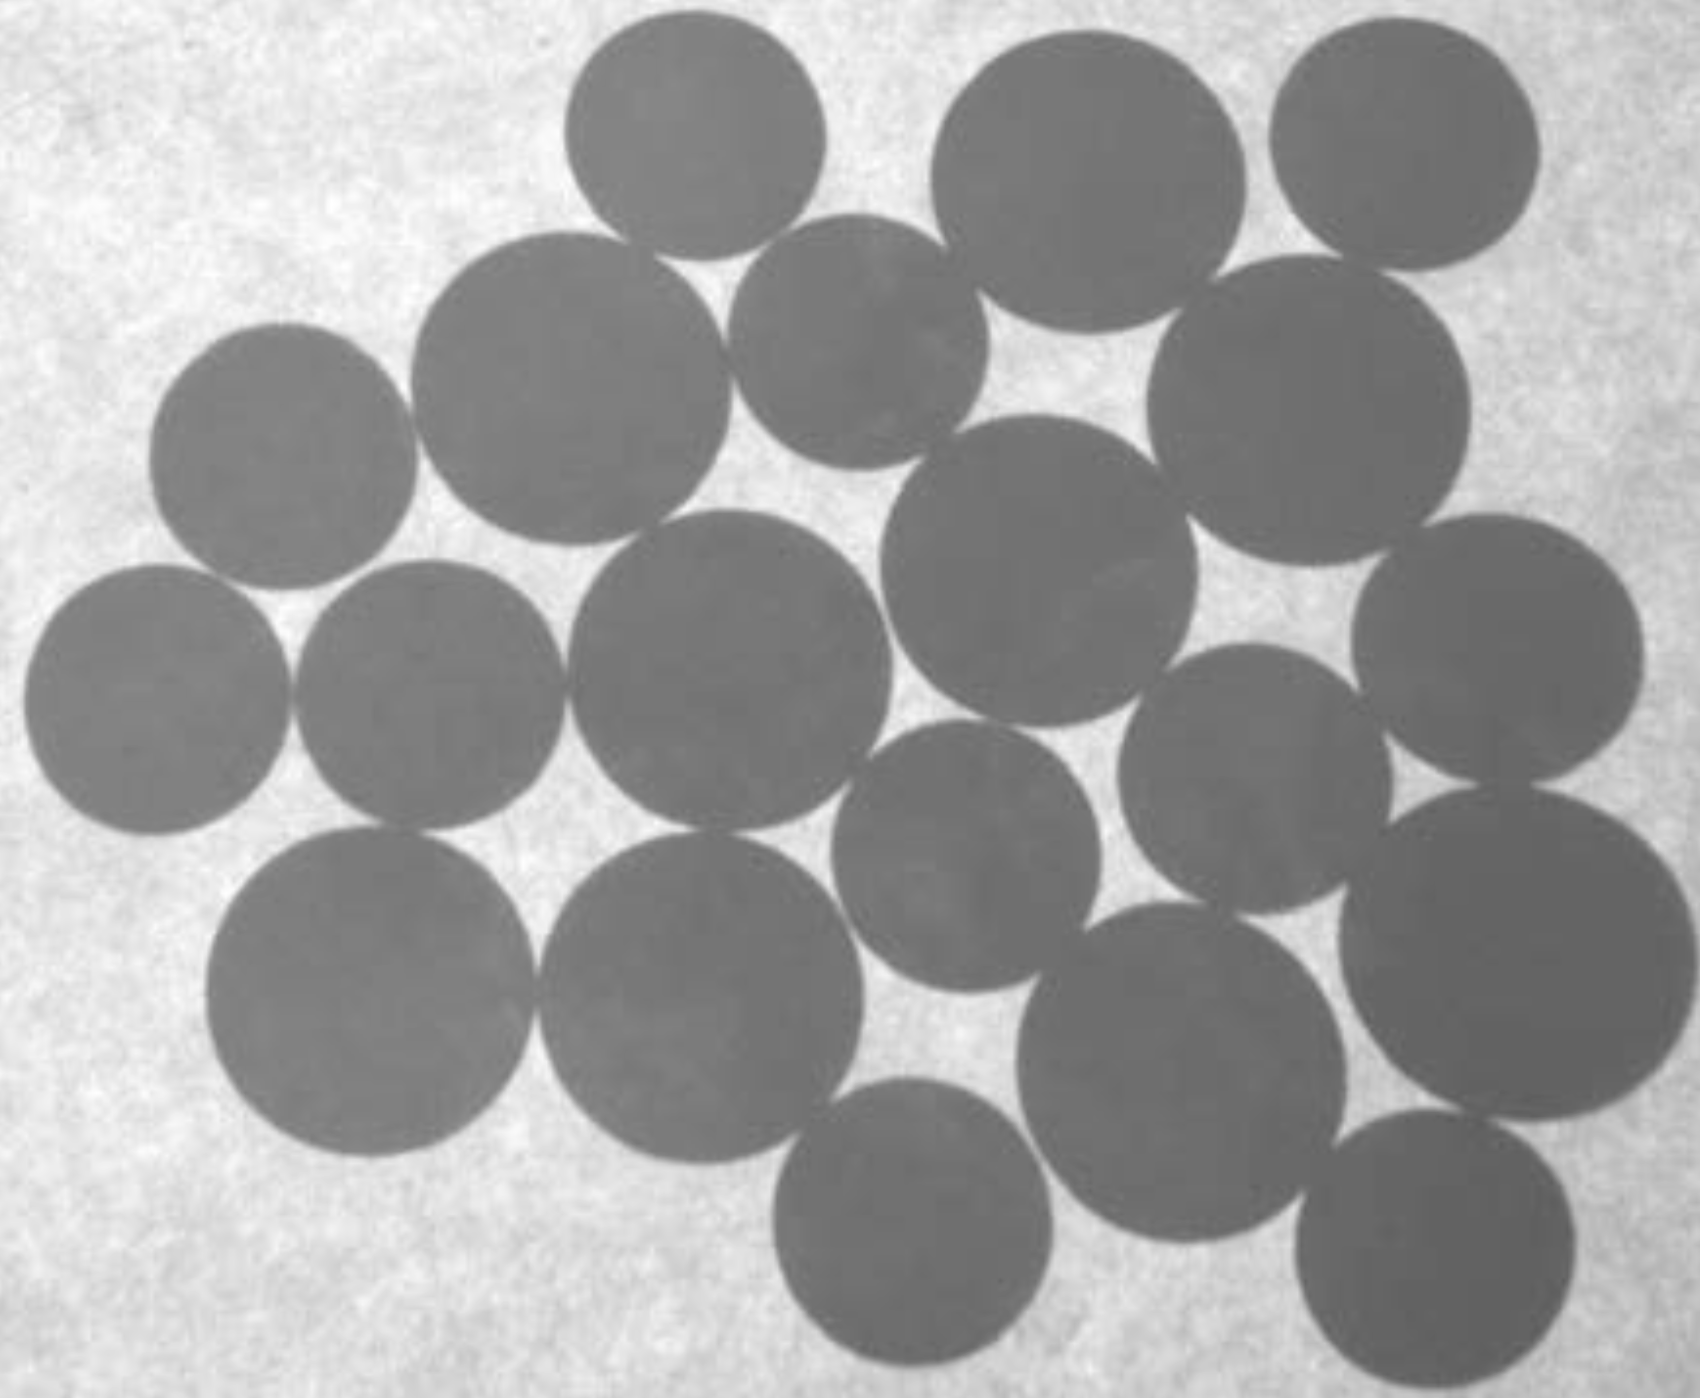

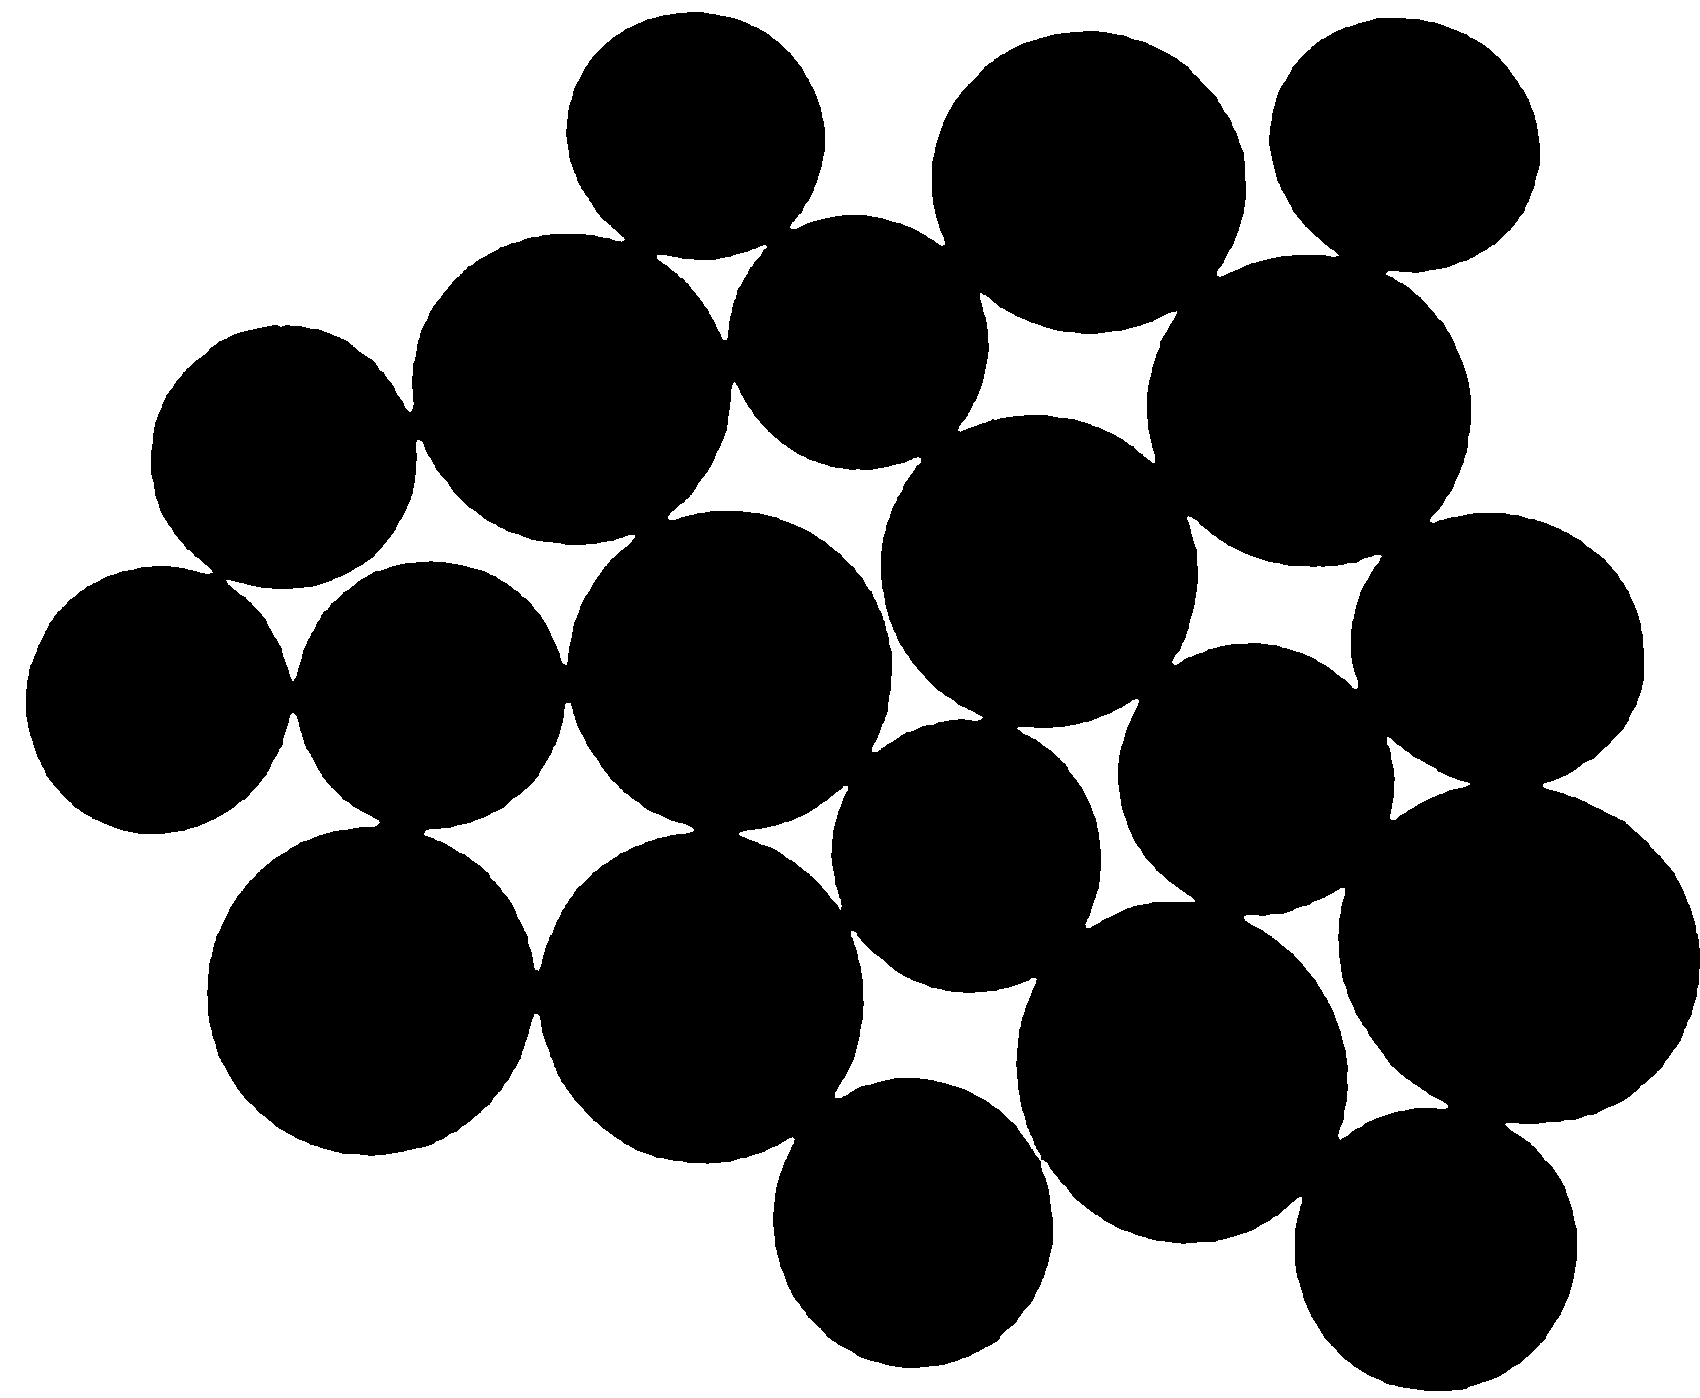

number of coins =  20


In [31]:
img = read_gray_image("images/moedas.png")
display_image(img)
f = img > 160
display_binary_image(f)
f = dilation(f, create_structure_element_cross(), 60)
coins = label(f, 0)

# número de moedas é o número de componentes conexas de cor preta
n = coins.max()
print('number of coins = ', n)

<p><b>Exercício b:</b> encontrar falhas numa cerca.</p>
<p>Método proposto na prova: encontrar os losangos de maior área da imagem e criar um quadrado que delimita a região da falha, de forma que seus vértices estejam nas pontas "quebradas" da cerca.
Houve falha ao implementar dessa forma porque obter o losango de maior área não nos dá as coordenadas dessa região.
Nova implementação: são feitos dois openings - o primeiro, com uma barra vertical, o segundo, com uma horizontal. A união desses resultados nos dá uma imagem demarcando os losangos grandes e facilita a inserção do quadrado delimitador das falhas.</p>



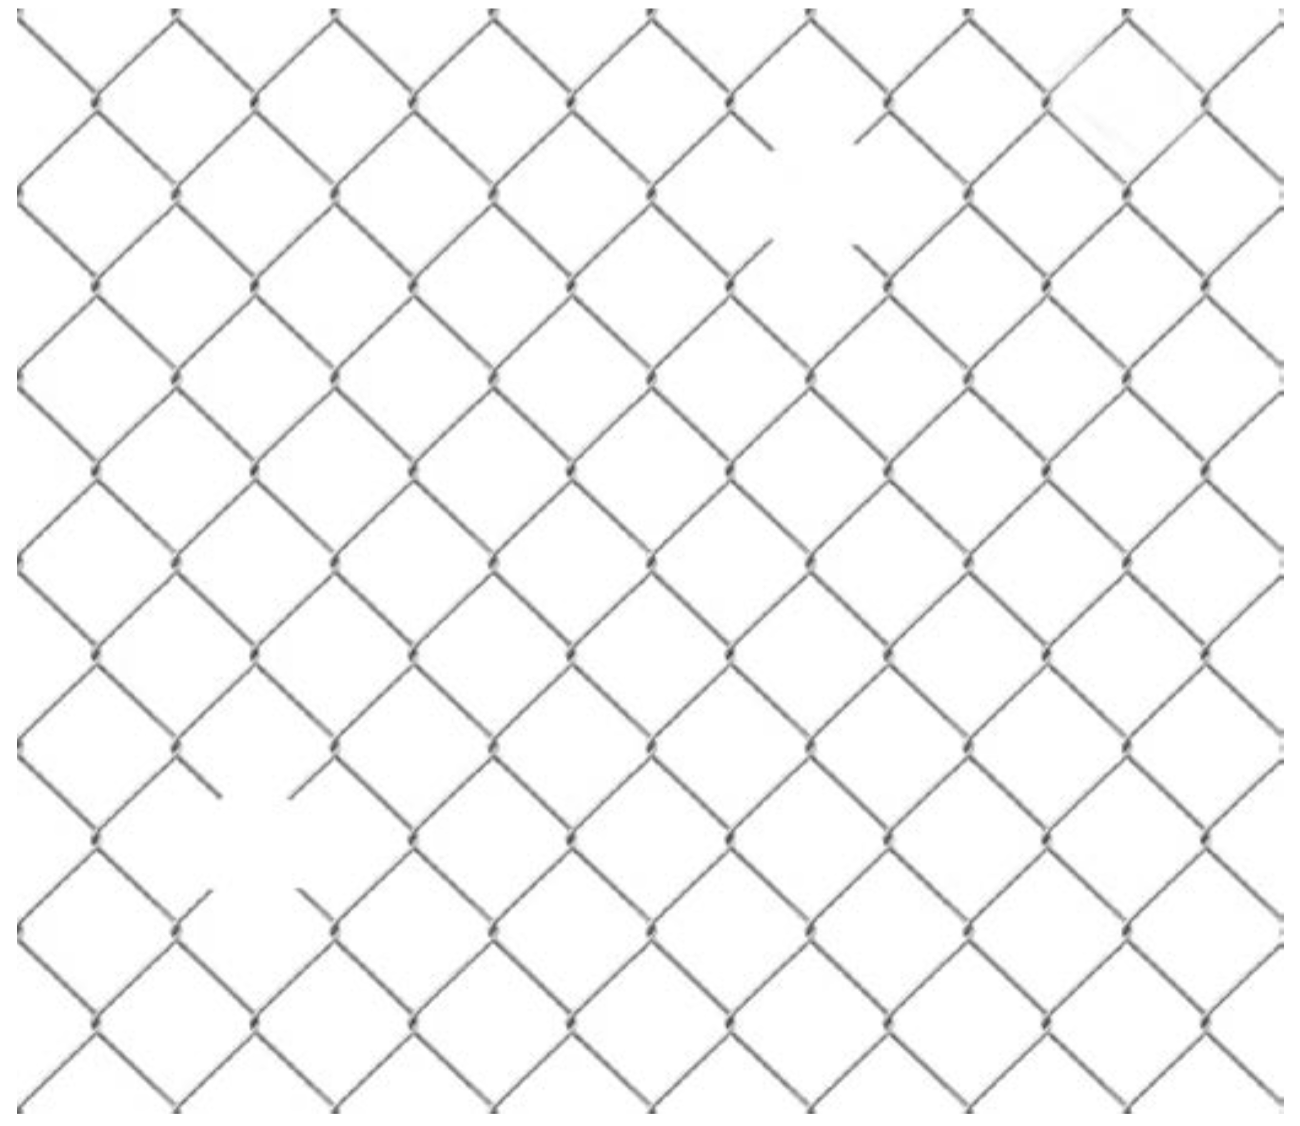

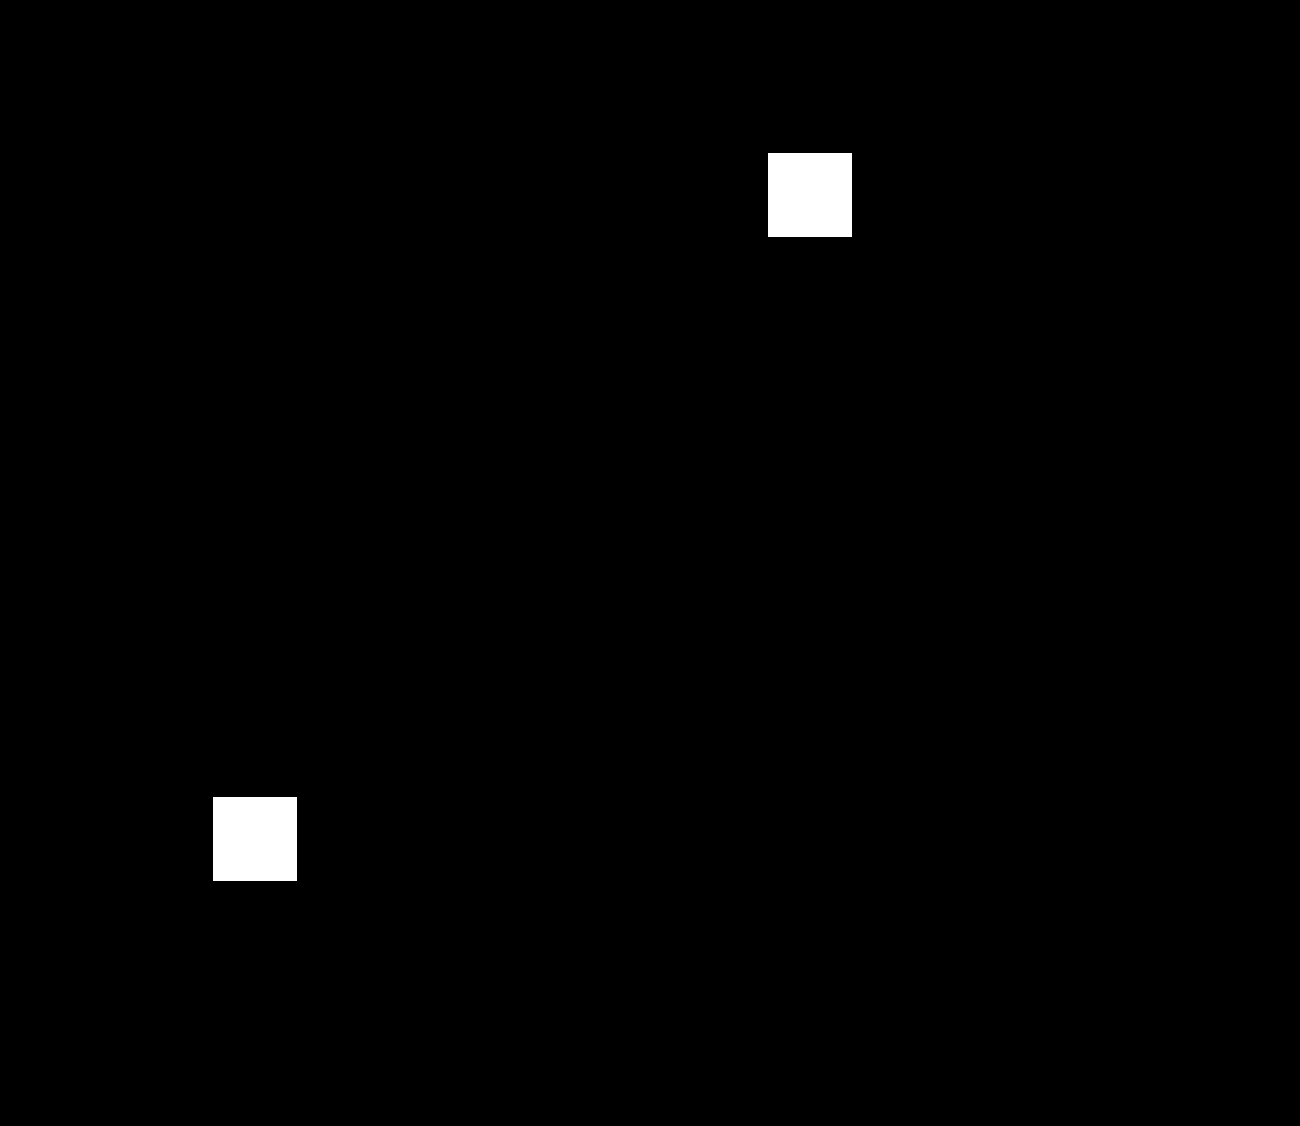

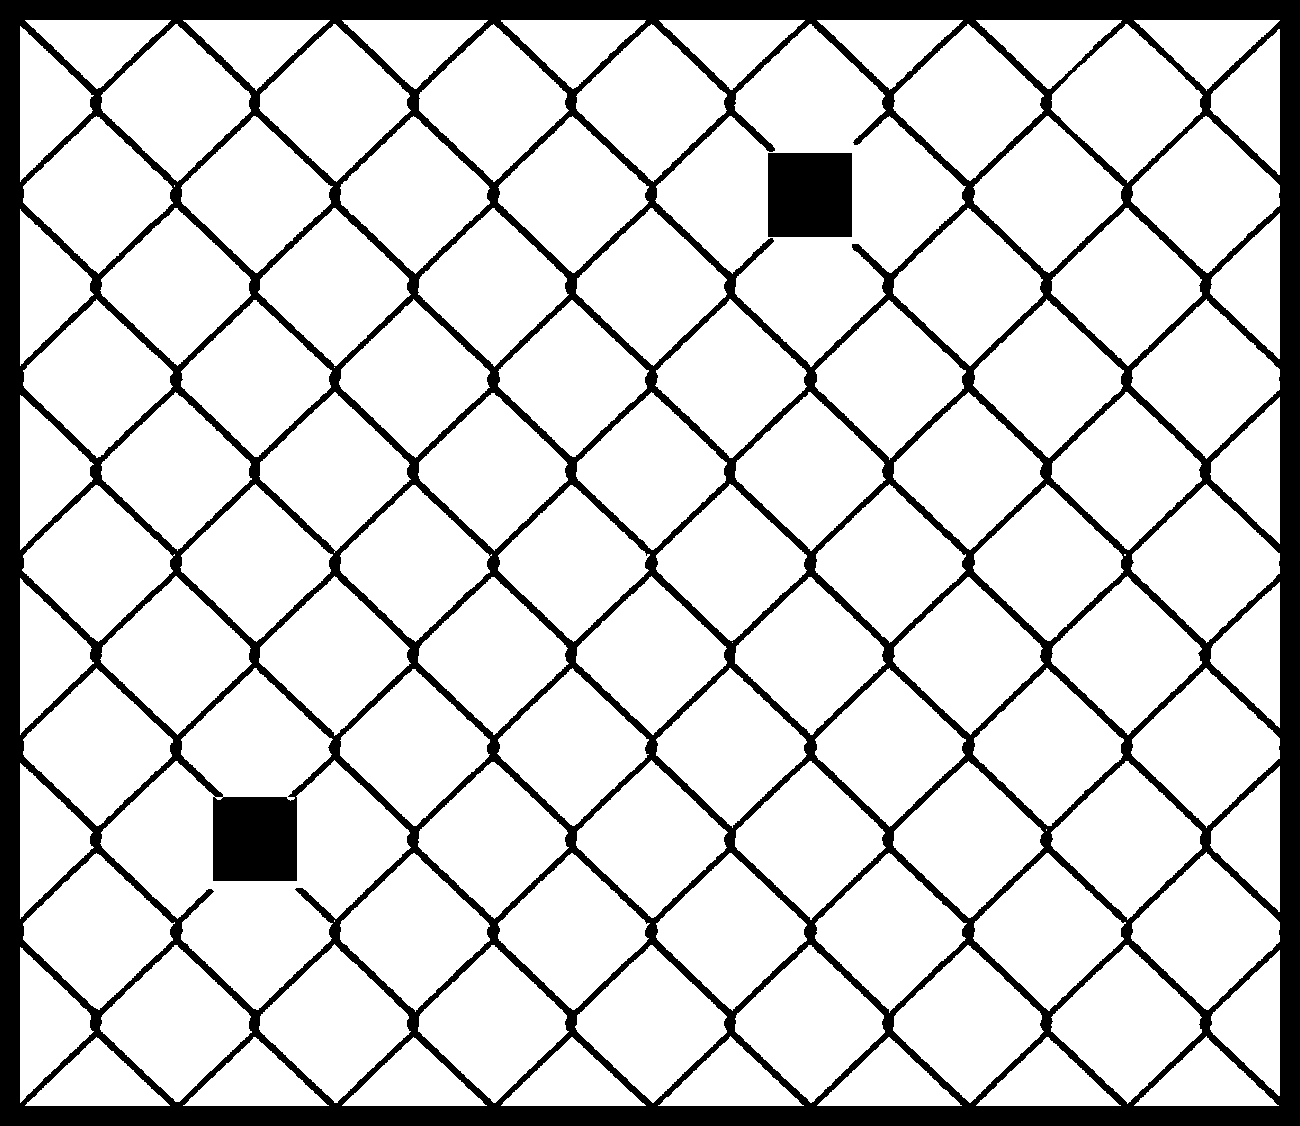

In [145]:
img = read_gray_image("images/cerca.png")
display_image(img)

f = img > 220
H, W = f.shape

# cria borda preta para conectar as "pontas externas" da cerca aos limites da imagem
f[:20, :] = 0
f[H-20:, :] = 0
f[:, :20] = 0
f[:, W-20:] = 0

# encontra as falhas fazendo opening com uma cruz grande
b1 = np.ones((180, 1), np.bool)
b2 = np.ones((1, 180), np.bool)

g1 = opening(f, b1)
g2 = opening(f, b2)

g = g1 + g2

# cria um quadrado para marcar a falha numa imagem nova
h = np.zeros((H, W), np.bool)

# falha superior
x, y = g[: int(g.shape[0] / 2), :].nonzero()
x0, xn = x.min(), x.max() + 1
y0, yn = y.min(), y.max() + 1
xc = x0 + int((xn - x0) / 2)
yc = y0 + int((yn - y0) / 2)

# cria um quadrado cujos vértices estão nas pontas "quebradas" da cerca
a1 = int((xn - x0) / 2 * np.sqrt(2))
l = int(a1 * np.sqrt(2) / 8)
h[xc - l : xc + l, yc - l : yc + l] = True

# falha inferior
x, y = g[int(g.shape[0] / 2): , :].nonzero()
x0, xn = x.min(), x.max() + 1
y0, yn = y.min(), y.max() + 1
xc = int(H / 2) + x0 + int((xn - x0) / 2)
yc = y0 + int((yn - y0) / 2)

a1 = int((xn - x0) / 2 * np.sqrt(2))
l = int(a1 * np.sqrt(2) / 8)
h[xc - l : xc + l, yc - l : yc + l] = True

display_binary_image(h)
display_binary_image(sub_with_saturation(f, h))